<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicConcepts/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Cross-Validation in Machine Learning

## Introduction
Cross-validation is a crucial technique in machine learning used to assess how well a model will generalize to new, unseen data. It helps prevent overfitting and provides a more reliable estimate of model performance than a single train-test split.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Why Do We Need Cross-Validation?

Traditional train-test splits have limitations:
1. The evaluation might depend heavily on the particular random split of the data
2. We might get lucky or unlucky with our split
3. We don't make full use of our data for training

Let's first look at a simple train-test split example:

In [ ]:
# Load sample dataset
iris = load_iris()
X = iris.data
y = iris.target

# Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

print(f"Test accuracy with simple split: {model.score(X_test, y_test):.3f}")

Test accuracy with simple split: 1.000


## K-Fold Cross-Validation

K-fold cross-validation involves:
1. Splitting the data into K equal parts (folds)
2. Using K-1 folds for training and 1 fold for testing
3. Repeating this process K times, each time using a different fold as the test set
4. Averaging the results

Let's implement this step by step:

In [ ]:
# Implement basic k-fold cross-validation
def simple_kfold_cv(X, y, k=5):
    # Create k roughly equal-sized folds
    fold_size = len(X) // k
    scores = []

    for i in range(k):
        # Create test indices for this fold
        test_start = i * fold_size
        test_end = (i + 1) * fold_size

        # Split data
        X_test = X[test_start:test_end]
        y_test = y[test_start:test_end]
        X_train = np.concatenate([X[:test_start], X[test_end:]])
        y_train = np.concatenate([y[:test_start], y[test_end:]])

        # Train and evaluate
        model = LogisticRegression(max_iter=200)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))

    return scores

# Run our simple implementation
scores = simple_kfold_cv(X, y)
print(f"Scores for each fold: {[f'{score:.3f}' for score in scores]}")
print(f"Average score: {np.mean(scores):.3f} ± {np.std(scores):.3f}")

Scores for each fold: ['1.000', '1.000', '0.867', '0.933', '0.833']
Average score: 0.927 ± 0.068


## Using scikit-learn's Cross-Validation Tools

Scikit-learn provides robust implementations of cross-validation techniques. Let's look at different methods:

Cross-validation scores: ['0.967', '1.000', '0.933', '0.967', '1.000']
Average CV score: 0.973 ± 0.025


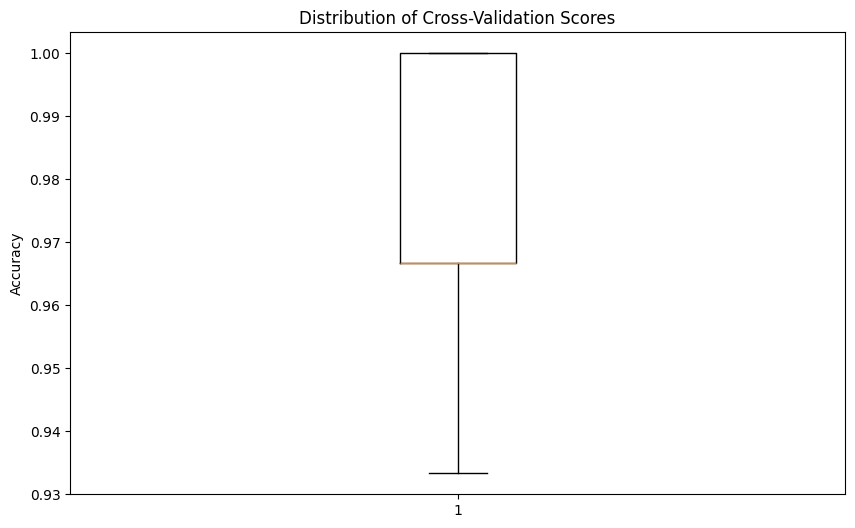

In [ ]:
# Using cross_val_score
cv_scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=5)
print(f"Cross-validation scores: {[f'{score:.3f}' for score in cv_scores]}")
print(f"Average CV score: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

# Visualize the distribution of scores
plt.figure(figsize=(10, 6))
plt.boxplot(cv_scores)
plt.title('Distribution of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()

## Different Types of Cross-Validation

1. K-Fold Cross-Validation (as shown above)
2. Stratified K-Fold (maintains class distribution)
3. Leave-One-Out Cross-Validation
4. Time Series Cross-Validation

Let's compare Stratified K-Fold with regular K-Fold:

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Regular K-Fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
kfold_scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=kfold)

# Stratified K-Fold
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
skfold_scores = cross_val_score(LogisticRegression(max_iter=200), X, y, cv=skfold)

print("Regular K-Fold scores:", [f'{score:.3f}' for score in kfold_scores])
print(f"Average: {kfold_scores.mean():.3f} ± {kfold_scores.std():.3f}")
print("\nStratified K-Fold scores:", [f'{score:.3f}' for score in skfold_scores])
print(f"Average: {skfold_scores.mean():.3f} ± {skfold_scores.std():.3f}")

Regular K-Fold scores: ['1.000', '1.000', '0.933', '0.967', '0.967']
Average: 0.973 ± 0.025

Stratified K-Fold scores: ['1.000', '0.967', '0.933', '1.000', '0.933']
Average: 0.967 ± 0.030


## Best Practices and Considerations

1. Choose k based on dataset size (common values: 5 or 10)
2. Use Stratified K-Fold for classification problems
3. Consider computational costs
4. Use random state for reproducibility
5. Be aware of data leakage

## Common Pitfalls to Avoid

1. Data leakage during preprocessing
2. Overfitting to the cross-validation results
3. Not stratifying when necessary
4. Using cross-validation scores for final model evaluation